#Predicting Electricity Prices

### Data Preprocessing

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('energy_dataset.csv', parse_dates = ['time'])
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [79]:
data.time = pd.to_datetime(data.time, utc = True, infer_datetime_format= True)
data = data.set_index('time')
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [80]:
data.isnull().sum()

generation biomass                               15
generation fossil brown coal/lignite             15
generation fossil coal-derived gas               15
generation fossil gas                            15
generation fossil hard coal                      15
generation fossil oil                            15
generation fossil oil shale                      15
generation fossil peat                           15
generation geothermal                            15
generation hydro pumped storage aggregated     5862
generation hydro pumped storage consumption      15
generation hydro run-of-river and poundage       15
generation hydro water reservoir                 15
generation marine                                15
generation nuclear                               15
generation other                                 15
generation other renewable                       15
generation solar                                 15
generation waste                                 15
generation w

In [81]:
# Count number of zeros in all columns of Dataframe
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print(f"{column_name:{50}} : {count}")

generation biomass                                 : 0
generation fossil brown coal/lignite               : 1852
generation fossil coal-derived gas                 : 5847
generation fossil gas                              : 0
generation fossil hard coal                        : 0
generation fossil oil                              : 0
generation fossil oil shale                        : 5847
generation fossil peat                             : 5847
generation geothermal                              : 5847
generation hydro pumped storage aggregated         : 0
generation hydro pumped storage consumption        : 1921
generation hydro run-of-river and poundage         : 0
generation hydro water reservoir                   : 0
generation marine                                  : 5847
generation nuclear                                 : 0
generation other                                   : 0
generation other renewable                         : 0
generation solar                            

In [82]:
data.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal'], inplace = True, axis = 1)

In [83]:
data.isnull().sum()

generation biomass                             15
generation fossil brown coal/lignite           15
generation fossil gas                          15
generation fossil hard coal                    15
generation fossil oil                          15
generation hydro pumped storage consumption    15
generation hydro run-of-river and poundage     15
generation hydro water reservoir               15
generation nuclear                             15
generation other                               15
generation other renewable                     15
generation solar                               15
generation waste                               15
generation wind onshore                        15
forecast solar day ahead                        1
forecast wind onshore day ahead                 1
total load forecast                             1
total load actual                              25
price day ahead                                 1
price actual                                    1


In [84]:
plt.rcParams['figure.figsize'] = (15, 5)

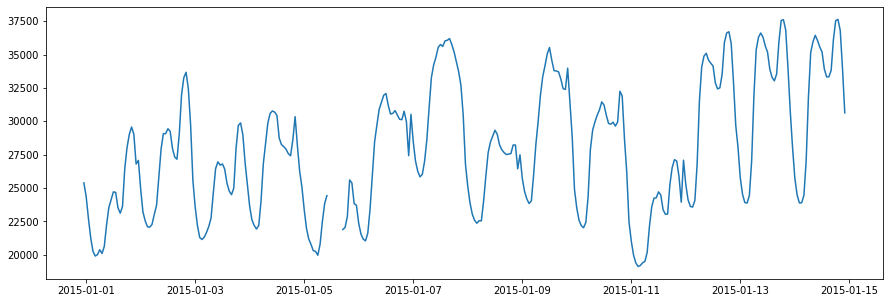

In [85]:
plt.plot(data['total load actual'][:24*7*2])

In [86]:
# Linear Interpolate the missing values in the dataset
data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [87]:
data.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [88]:
data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [89]:
# creating a new column to sum the total Generationof power
data['total generation'] = data['generation biomass'] + data['generation fossil brown coal/lignite'] + data['generation fossil gas'] + data['generation fossil hard coal'] + data['generation fossil oil'] + data['generation hydro pumped storage consumption'] + data['generation hydro run-of-river and poundage'] + data['generation hydro water reservoir'] + data['generation nuclear'] + data['generation other'] + data['generation other renewable'] + data['generation solar'] + data['generation waste'] + data['generation wind onshore']

In [90]:
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,total generation
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,28251.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,27818.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,26796.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,25223.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,24620.0


### Data Visualization

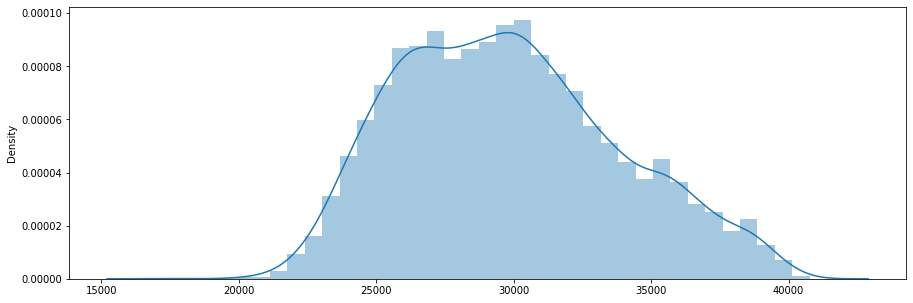

In [91]:
# Total Generation
sns.distplot(x= data['total generation'], kde = True)

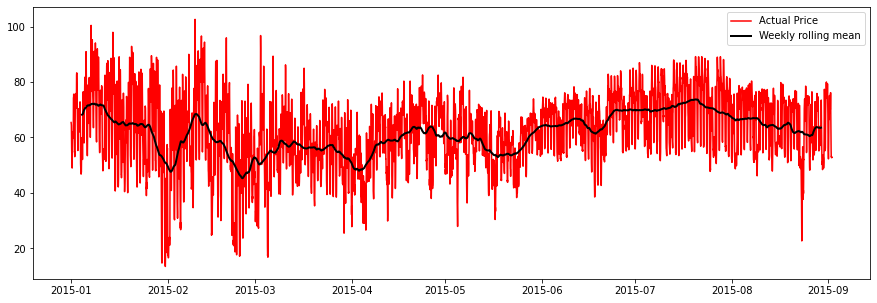

In [92]:
#Ploting the actual hourly electricity price and its rolling mean over a week
fig, ax = plt.subplots(1,1)
rolling = data['price actual'].rolling(24*7, center = True).mean()
ax.plot(data['price actual'], color = 'r', label='Actual Price')
ax.plot(rolling, color = 'black', linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.legend()
plt.show()

### Splitting Data

In [93]:
def prepare_dataset(data, size):
  x_data = []
  y_data = []

  l = len(data) - size

  for i in range(l):
    x = data[i:i+size]
    y = data[i+size]
    x_data.append(x)
    y_data.append(y)

  return np.array(x_data), np.array(y_data)

In [94]:
def plot_model_rmse_and_loss(history, title):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')

    plt.suptitle(title, fontweight = 'bold',  fontsize= 15)
    
    plt.show()

### Forecasting Daily Electricity Prices

In [95]:
from sklearn.preprocessing import MinMaxScaler

data_filtered = data['price actual'].values

scaler = MinMaxScaler(feature_range = (0,1))

scaled_data = scaler.fit_transform(data_filtered.reshape(-1,1))
scaled_data.shape

(5862, 1)

In [96]:
train_size = int(np.ceil(len(scaled_data) * 0.8))
test_size = int((len(scaled_data) - train_size) *0.5)
print(train_size, test_size)

4690 586


In [97]:
xtrain, ytrain = prepare_dataset(scaled_data[:train_size], 25)
xval, yval = prepare_dataset(scaled_data[train_size-25:train_size +test_size], 25)
xtest, ytest = prepare_dataset(scaled_data[train_size + test_size-25:], 25)

In [98]:
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)

(4665, 25, 1)
(586, 25, 1)
(586, 25, 1)


### Forecasting

In [99]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, SimpleRNN

In [100]:
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

### Stacked SimpleRNN

In [101]:
model_SimpleRNN = Sequential()
model_SimpleRNN.add(SimpleRNN(128, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
model_SimpleRNN.add(SimpleRNN(64, return_sequences = False))
model_SimpleRNN.add(Dense(64))
model_SimpleRNN.add(Dropout(0.2))
model_SimpleRNN.add(Dense(1))
model_SimpleRNN.compile(loss = loss, metrics = metric, optimizer = optimizer)

history = model_SimpleRNN.fit(xtrain, ytrain, epochs = 100, validation_data =(xval,yval), callbacks = early_stopping)

Epoch 1/100
146/146 [==============================] - 7s 41ms/step - loss: 0.0575 - root_mean_squared_error: 0.2399 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485
Epoch 2/100
146/146 [==============================] - 6s 38ms/step - loss: 0.0070 - root_mean_squared_error: 0.0836 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 3/100
146/146 [==============================] - 6s 39ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 4/100
146/146 [==============================] - 6s 38ms/step - loss: 0.0043 - root_mean_squared_error: 0.0655 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 5/100
146/146 [==============================] - 5s 38ms/step - loss: 0.0037 - root_mean_squared_error: 0.0605 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0505
Epoch 6/100
146/146 [==============================] - 6s 38ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0

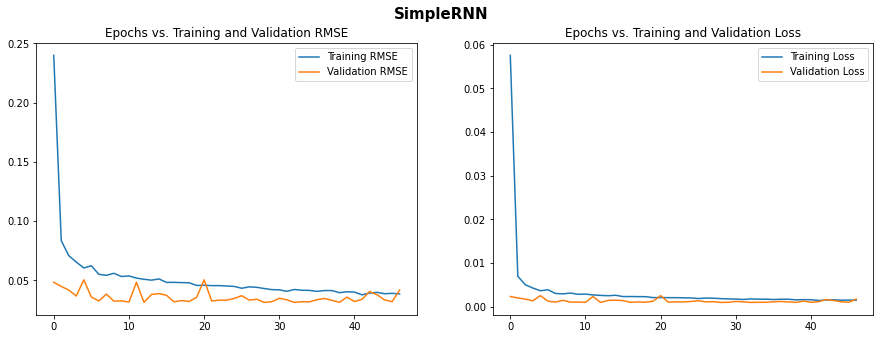

In [102]:
plot_model_rmse_and_loss(history,"SimpleRNN")

In [103]:
predictions = model_SimpleRNN.predict(xtest)
predictions = scaler.inverse_transform(predictions)
simplernn_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"Root Mean Squared Error for SimpleRNN = {simplernn_rmse}")

19/19 [==============================] - 0s 5ms/step
Root Mean Squared Error for SimpleRNN = 61.678677475775366


### Single Layer LSTM

In [104]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, input_shape = (xtrain.shape[1], 1)))
model_LSTM.add(Flatten())
model_LSTM.add(Dense(128, activation = 'relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(64, activation = 'relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss = loss, metrics = metric, optimizer = optimizer)

history = model_LSTM.fit(xtrain, ytrain, epochs = 100, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/100
146/146 [==============================] - 3s 8ms/step - loss: 0.0132 - root_mean_squared_error: 0.1092 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 2/100
146/146 [==============================] - 1s 5ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 3/100
146/146 [==============================] - 1s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0633 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 4/100
146/146 [==============================] - 1s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0600 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 5/100
146/146 [==============================] - 1s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0430
Epoch 6/100
146/146 [==============================] - 1s 6ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0018 

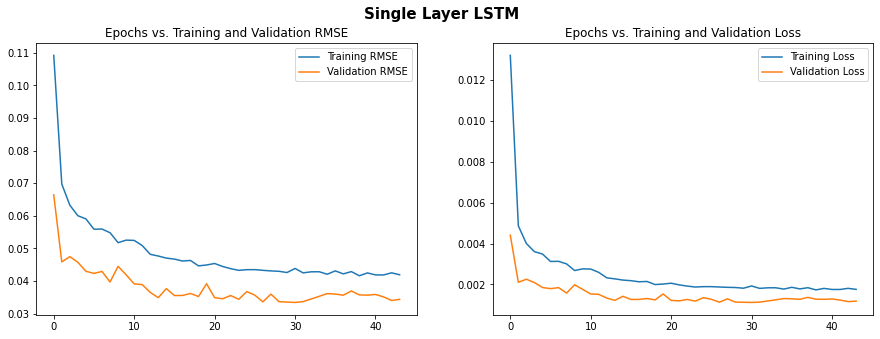

In [105]:
plot_model_rmse_and_loss(history,"Single Layer LSTM")

In [106]:
predictions = model_LSTM.predict(xtest)
predictions = scaler.inverse_transform(predictions)
singleLSTM_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"Root Mean Squared Error for Single Layer LSTM = {singleLSTM_rmse}")

19/19 [==============================] - 0s 2ms/step
Root Mean Squared Error for Single Layer LSTM = 63.82885176742538


### Stacked LSTM

In [107]:
model_StackedLSTM = Sequential()
model_StackedLSTM.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model_StackedLSTM.add(LSTM(64, return_sequences=False))
model_StackedLSTM.add(Dense(64))
model_StackedLSTM.add(Dropout(0.2))
model_StackedLSTM.add(Dense(1))
model_StackedLSTM.compile(loss = loss, metrics = metric, optimizer = optimizer)
history = model_StackedLSTM.fit(xtrain, ytrain, epochs = 100, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/100
146/146 [==============================] - 5s 12ms/step - loss: 0.0250 - root_mean_squared_error: 0.1495 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970
Epoch 2/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0083 - root_mean_squared_error: 0.0914 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0526
Epoch 3/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0040 - root_mean_squared_error: 0.0631 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0422
Epoch 4/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 5/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0391
Epoch 6/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0016

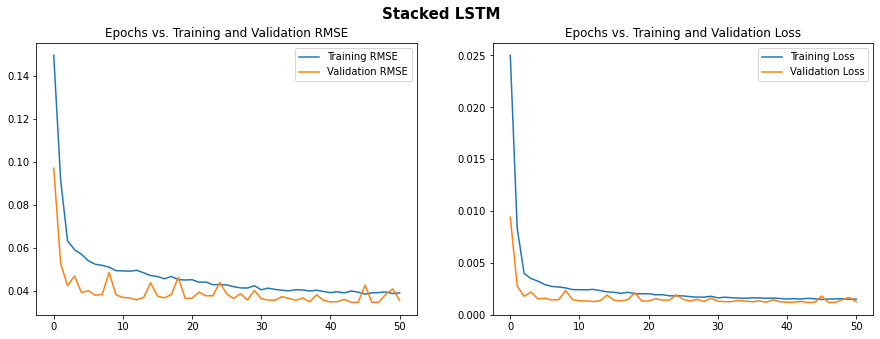

19/19 [==============================] - 1s 4ms/step

Root Mean Squared Error for Stacked LSTM = 63.89239193904302


In [108]:
plot_model_rmse_and_loss(history,"Stacked LSTM")
predictions = model_StackedLSTM.predict(xtest)
predictions = scaler.inverse_transform(predictions)
stackedLSTM_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"\nRoot Mean Squared Error for Stacked LSTM = {stackedLSTM_rmse}")

### CNN

In [109]:
model_CNN = Sequential()
model_CNN.add(Conv1D(filters = 48, kernel_size =2, padding = 'causal', activation = 'relu', input_shape = (xtrain.shape[1], 1)))
model_CNN.add(Flatten())
model_CNN.add(Dense(48, activation = 'relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(1))
model_CNN.compile(loss = loss, metrics = metric, optimizer = optimizer)
history = model_CNN.fit(xtrain, ytrain, epochs = 100, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/100
146/146 [==============================] - 1s 4ms/step - loss: 0.0134 - root_mean_squared_error: 0.1099 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 2/100
146/146 [==============================] - 0s 3ms/step - loss: 0.0056 - root_mean_squared_error: 0.0747 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 3/100
146/146 [==============================] - 0s 3ms/step - loss: 0.0048 - root_mean_squared_error: 0.0694 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0444
Epoch 4/100
146/146 [==============================] - 0s 3ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0344
Epoch 5/100
146/146 [==============================] - 0s 3ms/step - loss: 0.0035 - root_mean_squared_error: 0.0588 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 6/100
146/146 [==============================] - 1s 3ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0015 

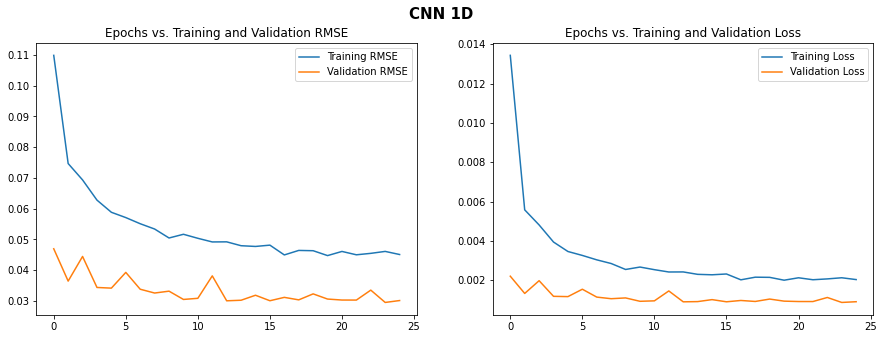

19/19 [==============================] - 0s 2ms/step

Root Mean Squared Error for CNN 1D = 63.72521960579247


In [110]:
plot_model_rmse_and_loss(history,"CNN 1D")
predictions = model_CNN.predict(xtest)
predictions = scaler.inverse_transform(predictions)
CNN_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"\nRoot Mean Squared Error for CNN 1D = {CNN_rmse}")

### CNN-LSTM

In [111]:
model_CNN_LSTM = Sequential()
model_CNN_LSTM.add(Conv1D(filters = 100, kernel_size =2, padding = 'causal', activation = 'relu', input_shape = (xtrain.shape[1], 1)))
model_CNN_LSTM.add(LSTM(100, return_sequences = True))
model_CNN_LSTM.add(Flatten())
model_CNN_LSTM.add(Dense(100, activation = 'relu'))
model_CNN_LSTM.add(Dropout(0.2))
model_CNN_LSTM.add(Dense(1))
model_CNN_LSTM.compile(loss = loss, metrics = metric, optimizer = optimizer)
history = model_CNN_LSTM.fit(xtrain, ytrain, epochs = 100, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/100
146/146 [==============================] - 3s 8ms/step - loss: 0.0266 - root_mean_squared_error: 0.1540 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0914
Epoch 2/100
146/146 [==============================] - 1s 6ms/step - loss: 0.0095 - root_mean_squared_error: 0.0974 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 3/100
146/146 [==============================] - 1s 6ms/step - loss: 0.0069 - root_mean_squared_error: 0.0833 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 4/100
146/146 [==============================] - 1s 5ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 5/100
146/146 [==============================] - 1s 6ms/step - loss: 0.0044 - root_mean_squared_error: 0.0660 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0499
Epoch 6/100
146/146 [==============================] - 1s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.0015 

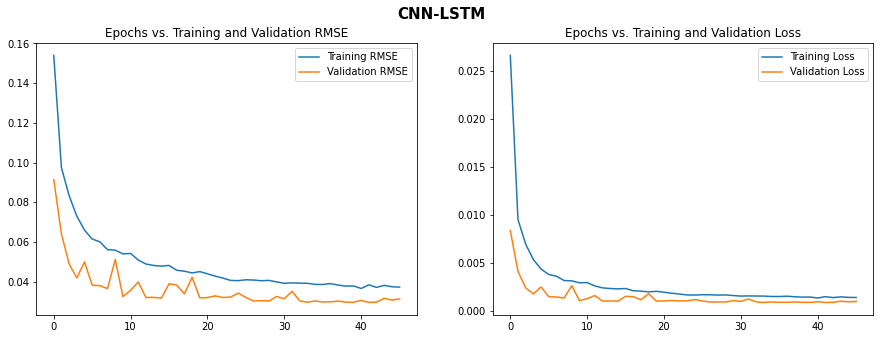

19/19 [==============================] - 0s 2ms/step


In [112]:
plot_model_rmse_and_loss(history,"CNN-LSTM")
predictions = model_CNN_LSTM.predict(xtest)
predictions = scaler.inverse_transform(predictions)
CNN_LSTM_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))

In [113]:
print(f"\nRoot Mean Squared Error for CNN-LSTM = {CNN_LSTM_rmse}")


Root Mean Squared Error for CNN-LSTM = 62.66498994487279


### Final Result

In [114]:
print(f"Root Mean Squared Error for SimpleRNN = {simplernn_rmse}")
print(f"Root Mean Squared Error for Single Layer LSTM = {singleLSTM_rmse}")
print(f"Root Mean Squared Error for Stacked LSTM = {stackedLSTM_rmse}")
print(f"Root Mean Squared Error for CNN 1D = {CNN_rmse}")
print(f"Root Mean Squared Error for CNN-LSTM = {CNN_LSTM_rmse}")

Root Mean Squared Error for SimpleRNN = 61.678677475775366
Root Mean Squared Error for Single Layer LSTM = 63.82885176742538
Root Mean Squared Error for Stacked LSTM = 63.89239193904302
Root Mean Squared Error for CNN 1D = 63.72521960579247
Root Mean Squared Error for CNN-LSTM = 62.66498994487279
